<a href="https://colab.research.google.com/github/SHWETA3101/100-days-of-code/blob/master/KNN_NEW_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
data = pd.read_csv('drive/My Drive/cellular_site_power_data.csv')

In [16]:
data.head()

,"Location (Latitude, Longitude)",Antennas (count),Radios (count),Transmit Power (Watts),Temperature (Celsius),Load (number of users),Voltage Supply (Volts),Battery Backup Status,Generator Status,Solar Panel Efficiency
0,"(30, -90)",5,6,13.378416,18.970816,94,224.221181,Idle,Running,0.884062
1,"(30, -89)",5,8,28.494497,37.267790,282,237.333120,Active,Running,0.936467
2,"(30, -88)",7,7,40.261592,35.179199,338,235.106665,Active,Running,0.951150
3,"(30, -87)",6,7,25.983496,19.517481,79,216.269914,Active,Running,0.869712
4,"(30, -86)",5,4,19.861965,12.280897,78,208.404272,Active,Stopped,0.973931


In [19]:
data[['Latitude', 'Longitude']] = data['Location (Latitude, Longitude)'].str.extract(r'\((.*),\s*(.*)\)', expand=True)
data[['Latitude', 'Longitude']] = data[['Latitude', 'Longitude']].astype(float)

In [20]:
data.drop('Location (Latitude, Longitude)', axis=1, inplace=True)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Antennas (count)        100 non-null    int64  
 1   Radios (count)          100 non-null    int64  
 2   Transmit Power (Watts)  100 non-null    float64
 3   Temperature (Celsius)   100 non-null    float64
 4   Load (number of users)  100 non-null    int64  
 5   Voltage Supply (Volts)  100 non-null    float64
 6   Battery Backup Status   100 non-null    object 
 7   Generator Status        100 non-null    object 
 8   Solar Panel Efficiency  100 non-null    float64
 9   Latitude                100 non-null    float64
 10  Longitude               100 non-null    float64
dtypes: float64(6), int64(3), object(2)
memory usage: 8.7+ KB


In [6]:
data.describe()

,Antennas (count),Radios (count),Transmit Power (Watts),Temperature (Celsius),Load (number of users),Voltage Supply (Volts),Solar Panel Efficiency
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,5.950000,5.820000,28.594164,25.197749,253.410000,221.464817,0.897506
std,1.459037,1.321004,10.579044,8.912380,141.102019,11.134406,0.058418
min,4.000000,4.000000,10.091529,10.083123,18.000000,200.963558,0.801497
25%,5.000000,5.000000,20.013715,18.252242,119.500000,211.998574,0.844487
50%,6.000000,6.000000,27.699055,26.191350,262.000000,222.280191,0.901975
75%,7.000000,7.000000,36.272391,33.410919,379.250000,231.334847,0.949586
max,8.000000,8.000000,49.810252,39.892661,493.000000,239.574565,0.999087


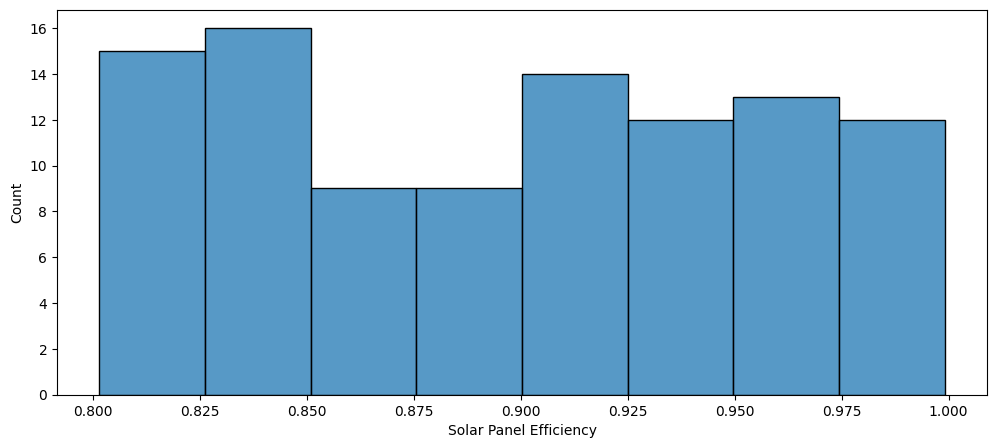

In [22]:
# Plot histogram of target variable
plt.figure(figsize=(12,5))

sns.histplot(data=data, x="Solar Panel Efficiency");
plt.xlabel('Solar Panel Efficiency');

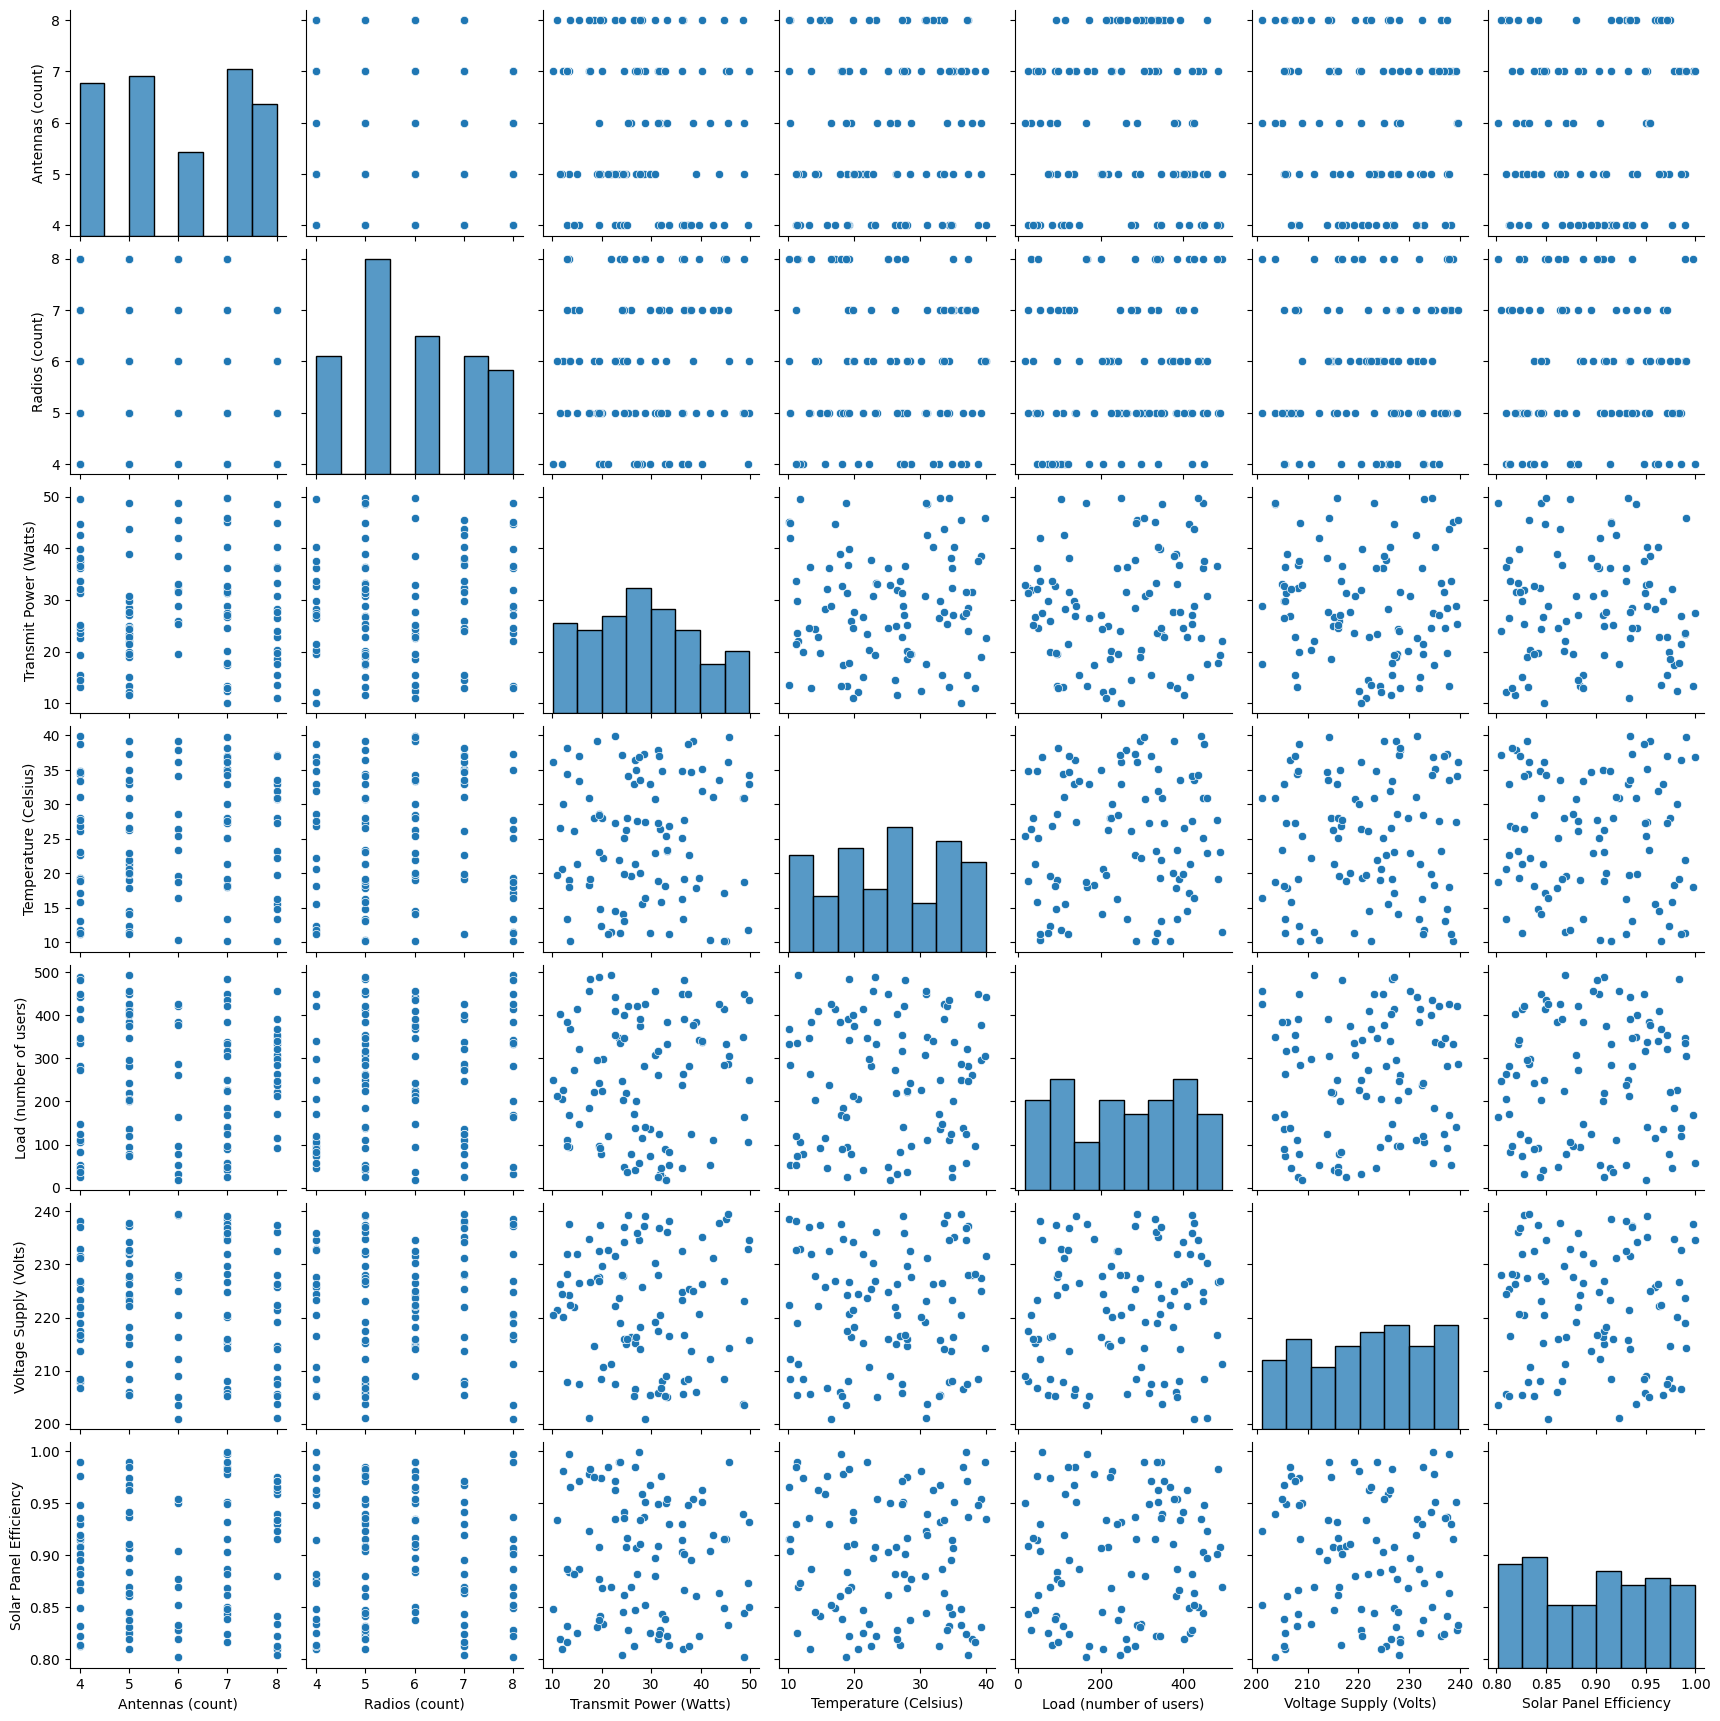

In [15]:
sns.pairplot(data)

In [23]:
data_corr = data[['Latitude', 'Longitude',
 'Antennas (count)',
 'Radios (count)',
 'Transmit Power (Watts)',
 'Temperature (Celsius)',
 'Load (number of users)',
 'Voltage Supply (Volts)',
 'Battery Backup Status',
 'Generator Status',
 'Solar Panel Efficiency']].corr()

<ipython-input-23-e58067de14f0>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  'Solar Panel Efficiency']].corr()


In [24]:
mask = np.triu(np.ones_like(data_corr, dtype=bool))

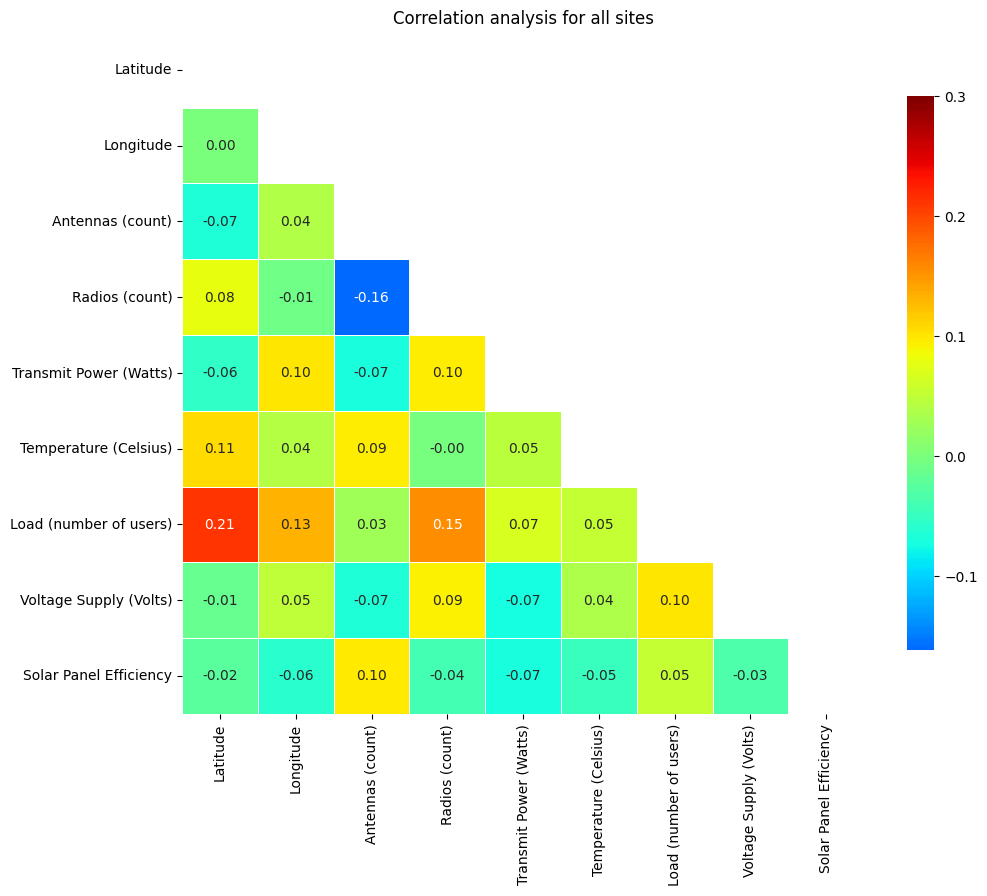

In [25]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(data_corr, mask=mask, cmap='jet', vmax=.3, center=0, annot=True, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .8});
plt.title('Correlation analysis for all sites');

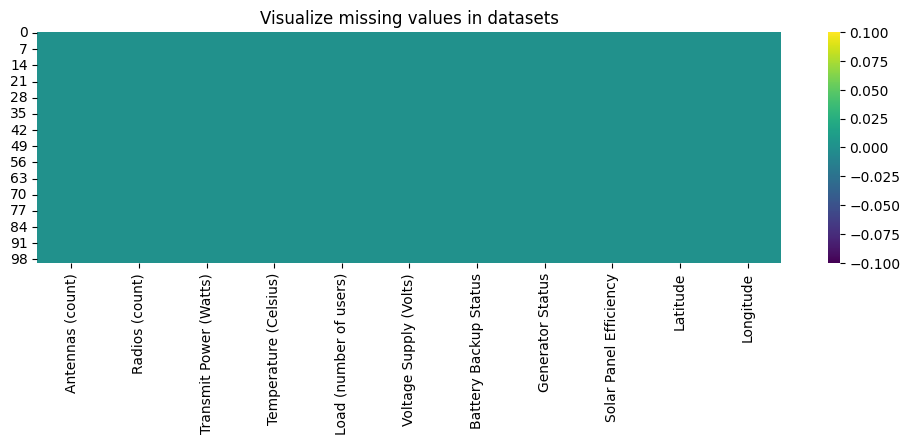

In [26]:
plt.figure(figsize=(12, 3))
sns.heatmap(data.isnull(), cmap='viridis');
plt.title('Visualize missing values in datasets');

In [27]:
#converting categorical data to numeric or encoding it
data = pd.get_dummies(data, columns=['Battery Backup Status', 'Generator Status'], drop_first=True)

In [28]:
data.sample(10)

,Antennas (count),Radios (count),Transmit Power (Watts),Temperature (Celsius),Load (number of users),Voltage Supply (Volts),Solar Panel Efficiency,Latitude,Longitude,Battery Backup Status_Idle,Generator Status_Stopped
25,7,5,28.729566,27.440550,140,239.190419,0.951400,32.0,-85.0,0,1
82,7,8,24.596242,25.131324,48,216.065941,0.862047,38.0,-88.0,1,0
38,5,7,43.739361,33.559836,425,237.742274,0.863924,33.0,-82.0,1,0
91,7,7,13.008846,38.223400,98,228.156200,0.816188,39.0,-89.0,1,1
95,7,4,27.138661,27.520392,422,235.856685,0.882217,39.0,-85.0,1,0
97,5,6,27.706091,19.978284,375,218.316396,0.910378,39.0,-83.0,1,1
87,8,6,13.580448,10.083123,368,222.448018,0.965557,38.0,-83.0,1,1
44,8,4,20.273582,22.170014,298,210.676758,0.834008,34.0,-86.0,1,0
47,8,4,26.529638,32.907249,171,205.311686,0.812234,34.0,-83.0,1,1
0,5,6,13.378416,18.970816,94,224.221181,0.884062,30.0,-90.0,1,0


In [29]:
#split data
from sklearn.model_selection import train_test_split

X = data.drop(columns=['Solar Panel Efficiency'])
y = data['Solar Panel Efficiency']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [34]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [35]:
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared (R^2): {r2}')

Mean Absolute Error: 0.058341495540552187
Mean Squared Error: 0.004184424597974698
R-squared (R^2): -0.18391086776888232


In [36]:
selected_columns = list(data.columns)

In [38]:
print(selected_columns)


['Antennas (count)', 'Radios (count)', 'Transmit Power (Watts)', 'Temperature (Celsius)', 'Load (number of users)', 'Voltage Supply (Volts)', 'Solar Panel Efficiency', 'Latitude', 'Longitude', 'Battery Backup Status_Idle', 'Generator Status_Stopped']


In [39]:
data_processed = data[selected_columns].reset_index(drop=True)

In [40]:
target_label = 'Solar Panel Efficiency'

In [41]:
input_feat = list(set(selected_columns).difference(set([target_label])))

In [43]:
#extract test set
data_X = data_processed[input_feat].reset_index(drop=True)

In [44]:
data_y = data_processed[target_label]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.2, random_state=42)

In [46]:
###setting up knn model pipeline
# Scale training data
estimators = []
estimators.append(('standardize', StandardScaler()))
# estimators.append(('minmax', MinMaxScaler()))
estimators.append(('knn', KNeighborsRegressor()))
knn_pipeline = Pipeline(estimators)

In [47]:
# Create list of each hyper-param to tune
n_neighbors_list = [int(x) for x in range (3, 18)]

weights_list = ['uniform', 'distance']

algorithm_list = ['auto', 'ball_tree', 'kd_tree', 'brute']

leaf_size_list = [20, 30, 40, 50, 60, 70]

p_list = [2, 3, 4, 5, 6]

In [48]:
# Structure model hyper-params as a dictionary
knn_grid = {'knn__n_neighbors':n_neighbors_list,
             'knn__weights':weights_list,
             'knn__algorithm':algorithm_list,
             'knn__leaf_size':leaf_size_list,
             'knn__p':p_list}

In [ ]:
#performing cross validation for test data of hyper tuning

In [49]:
# Create random search for LGBM model
knn_random = RandomizedSearchCV(estimator=knn_pipeline, param_distributions=knn_grid,
                                 n_iter=1000, cv=4, verbose=2, random_state=42,
                                 n_jobs=-1)

In [50]:
%%time
# Fit the random search LGBM model
knn_random.fit(X_train, y_train)

Fitting 4 folds for each of 1000 candidates, totalling 4000 fits
CPU times: user 3.22 s, sys: 190 ms, total: 3.41 s
Wall time: 41.2 s


RandomizedSearchCV(cv=4,
                   estimator=Pipeline(steps=[('standardize', StandardScaler()),
                                             ('knn', KNeighborsRegressor())]),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'knn__algorithm': ['auto', 'ball_tree',
                                                           'kd_tree', 'brute'],
                                        'knn__leaf_size': [20, 30, 40, 50, 60,
                                                           70],
                                        'knn__n_neighbors': [3, 4, 5, 6, 7, 8,
                                                             9, 10, 11, 12, 13,
                                                             14, 15, 16, 17],
                                        'knn__p': [2, 3, 4, 5, 6],
                                        'knn__weights': ['uniform',
                                                         'distance']},
                   random_state=42, verbose=2)

In [51]:
# Get optimal hyper-params
knn_random.best_params_

{'knn__weights': 'uniform',
 'knn__p': 5,
 'knn__n_neighbors': 10,
 'knn__leaf_size': 50,
 'knn__algorithm': 'ball_tree'}

In [52]:
# Get score of best model during hyper-param tuning
knn_random.best_score_

-0.10881578894883048

In [53]:
mean_score = knn_random.cv_results_['mean_test_score']
std_score = knn_random.cv_results_['std_test_score']
params = knn_random.cv_results_['params']

In [54]:
cv_score_df = pd.DataFrame(params)
cv_score_df['mean_score'] = mean_score
cv_score_df['std_score'] = std_score

In [55]:
knn_model = knn_pipeline.set_params(**knn_random.best_params_)

In [56]:
knn_model.fit(X_train, y_train)

Pipeline(steps=[('standardize', StandardScaler()),
                ('knn',
                 KNeighborsRegressor(algorithm='ball_tree', leaf_size=50,
                                     n_neighbors=10, p=5))])

In [57]:
y_pred = knn_model.predict(X_test)

In [ ]:
#evaluate model performance based on test set

In [58]:
# Explained variance
explained_variance_score(y_test.ravel(), y_pred)

-0.18655799263479866

In [59]:
# R2 score
r2_score(y_test.ravel(), y_pred)

-0.21258365274541458

In [60]:
# Mean absolute error
mean_absolute_error(y_test.ravel(), y_pred)

0.06434185213686629

In [61]:
# Root mean square error
np.sqrt(mean_squared_error(y_test.ravel(), y_pred))

0.06957450001855275

In [62]:
mean_absolute_percentage_error(y_test.ravel(), y_pred)*100

7.13754959480498

In [69]:
data[['Latitude','Longitude']].nunique()

Latitude     10
Longitude    10
dtype: int64